In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
train = pd.read_csv('arabic handwritten characters dataset csv/csvTrainImages 13440x1024.csv')
label = pd.read_csv('Arabic Handwritten Characters Dataset CSV/csvTrainLabel 13440x1.csv')

In [3]:
train.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.896,0.897,0.898,0.899,0.900,0.901,0.902,0.903,0.904,0.905
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
label

,1
0,1
1,1
2,1
3,1
4,1
...,...
13434,28
13435,28
13436,28
13437,28


In [5]:
train = train/255.0

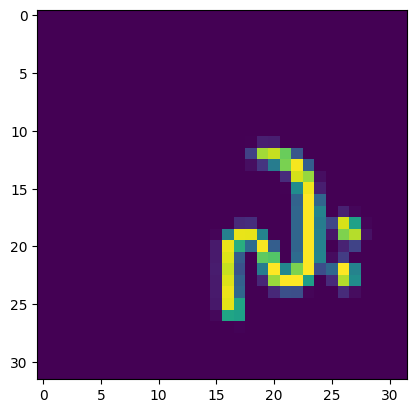

In [6]:
plt.imshow(train.loc[13434,:].to_numpy().reshape(32,32)) # each image contains 1024 pixles which translates to 32x32 

In [7]:
label.loc[13434]

1    28
Name: 13434, dtype: int64

In [8]:
label.value_counts()

1 
15    480
2     480
27    480
26    480
25    480
24    480
23    480
22    480
21    480
20    480
19    480
18    480
17    480
16    480
28    480
14    480
13    480
12    480
11    480
10    480
9     480
8     480
7     480
6     480
5     480
4     480
3     480
1     479
Name: count, dtype: int64

In [9]:
#Let's first split our data for training and testing

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train.values,label.values,test_size=.3,shuffle=True,random_state=2) 

In [10]:
#Reshaping our variables to fit into our CNN model, 
x_train = x_train.reshape(-1,32,32,1)
x_test = x_test.reshape(-1,32,32,1)

In [11]:
y_test = y_test.reshape(len(y_test),)

In [12]:
y_test

array([23, 10, 28, ...,  8,  3,  3], dtype=int64)

In [13]:
from tensorflow import keras

In [14]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(32,32,1)),
    keras.layers.Conv2D(24,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(29,activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.94):
      print("\nReached 94% accuracy so cancelling training!")
      self.model.stop_training=True
callbacks = myCallback()

In [16]:
history = model.fit(x_train,y_train,epochs=40,callbacks=[callbacks],validation_data=(x_test,y_test))

Epoch 1/40
294/294 [==============================] - 4s 13ms/step - loss: 2.2412 - accuracy: 0.3399 - val_loss: 1.4778 - val_accuracy: 0.5640
Epoch 2/40
294/294 [==============================] - 3s 11ms/step - loss: 1.2923 - accuracy: 0.6018 - val_loss: 0.9161 - val_accuracy: 0.7369
Epoch 3/40
294/294 [==============================] - 3s 11ms/step - loss: 0.9030 - accuracy: 0.7148 - val_loss: 0.6861 - val_accuracy: 0.8016
Epoch 4/40
294/294 [==============================] - 3s 11ms/step - loss: 0.7056 - accuracy: 0.7830 - val_loss: 0.5668 - val_accuracy: 0.8333
Epoch 5/40
294/294 [==============================] - 3s 11ms/step - loss: 0.5838 - accuracy: 0.8138 - val_loss: 0.4943 - val_accuracy: 0.8517
Epoch 6/40
294/294 [==============================] - 3s 11ms/step - loss: 0.5025 - accuracy: 0.8436 - val_loss: 0.4498 - val_accuracy: 0.8658
Epoch 7/40
294/294 [==============================] - 3s 11ms/step - loss: 0.4433 - accuracy: 0.8581 - val_loss: 0.4057 - val_accuracy: 0.8785

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

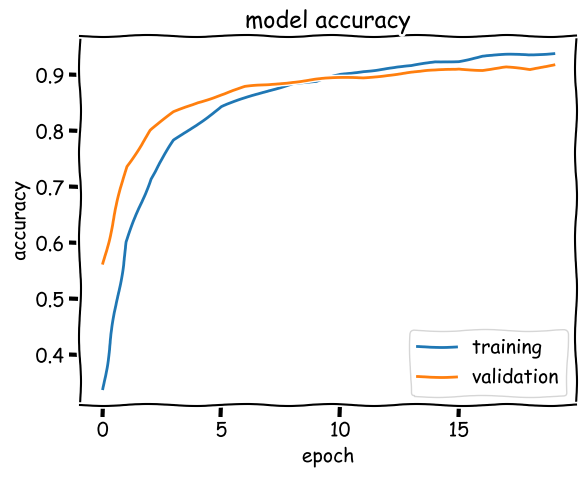

In [17]:
with plt.xkcd():
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()

In [18]:
pred = model.predict(x_test)

126/126 [==============================] - 1s 3ms/step


In [19]:
pred = [np.argmax(i) for i in pred]

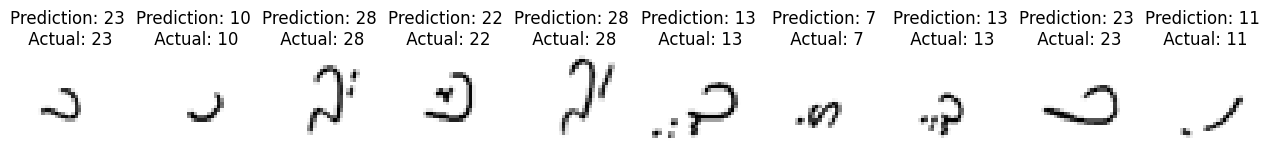

In [20]:
_,axes = plt.subplots(nrows=1,ncols=10 , figsize=(16,4))
for ax,image, actual, prediction in zip(axes,x_test,y_test,pred):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r)
    ax.set_title(f'Prediction: {prediction}\n Actual: {actual}')